<a href="https://colab.research.google.com/github/BaraaDawod/UVIC-SENG-474/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import operator


In [207]:
# fetch dataset
def split_dataset(X, y, test_size=0.2):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
  return X_train, X_test, y_train, y_test


In [208]:

def train_model(X_train, X_test, y_train, y_test, random_state=0, max_depth=15, criterion="entropy"):
  # criterion: log_loss, gini, entropy
  model_D3 = DecisionTreeClassifier(random_state=random_state, max_depth=max_depth, criterion=criterion).fit(X_train, y_train)
  print("Accuracy on Training",model_D3.score(X_train,y_train))
  print("Accuracy on Test",model_D3.score(X_test,y_test))

  return model_D3


In [209]:
def prune_tree(model_D3, X_train, y_train):
  spambase = fetch_ucirepo(id=94)

  path = model_D3.cost_complexity_pruning_path(X_train, y_train)
  ccp_alphas, impurities = path.ccp_alphas, path.impurities
  return ccp_alphas, impurities


In [210]:
def plot_impurity_vs_alpha(ccp_alphas, impurities):
  fig, ax = plt.subplots()
  ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
  ax.set_xlabel("effective alpha")
  ax.set_ylabel("total impurity of leaves")
  ax.set_title("Total Impurity vs effective alpha for training set")

In [211]:
def train_decision_trees_with_alphas(ccp_alphas, X_train, y_train, random_state=0):
  clfs = []
  for ccp_alpha in ccp_alphas:
      clf = DecisionTreeClassifier(random_state=random_state, ccp_alpha=ccp_alpha)
      clf.fit(X_train, y_train)
      clfs.append(clf)
  print(
      "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
          clfs[-1].tree_.node_count, ccp_alphas[-1]
      )
  )
  return clfs

In [212]:
def plot_nodes_and_depth_against_alpha(clfs, ccp_alphas):
  clfs = clfs[:-1]
  ccp_alphas = ccp_alphas[:-1]

  node_counts = [clf.tree_.node_count for clf in clfs]
  depth = [clf.tree_.max_depth for clf in clfs]

  fig, ax = plt.subplots(2, 1)
  ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
  ax[0].set_xlabel("alpha")
  ax[0].set_ylabel("number of nodes")
  ax[0].set_title("Number of nodes vs alpha")
  ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
  ax[1].set_xlabel("alpha")
  ax[1].set_ylabel("depth of tree")
  ax[1].set_title("Depth vs alpha")
  fig.tight_layout()

In [213]:
def plot_accuracy_vs_alpha_for_training_and_testing(X_train, X_test, y_train, y_test, clfs, ccp_alphas):
  train_scores = [clf.score(X_train, y_train) for clf in clfs]
  test_scores = [clf.score(X_test, y_test) for clf in clfs]

  max_train_index, max_train_value = max(enumerate(train_scores), key=operator.itemgetter(1))
  max_test_index, max_test_value = max(enumerate(test_scores), key=operator.itemgetter(1))

  print(f"Max Training Score: {max_train_value:.8f}; Alpha: {ccp_alphas[max_train_index]:.8f}")
  print(f"Max Testing Score: {max_test_value:.8f}; Alpha: {ccp_alphas[max_test_index]:.8f}")

  fig, ax = plt.subplots()
  ax.set_xlabel("alpha")
  ax.set_ylabel("accuracy")
  ax.set_title("Accuracy vs alpha for training and testing sets")
  ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
  ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
  ax.legend()
  plt.show()

In [214]:
def test_single_case(X, y, test_size=0.25, random_state=0, max_depth=8, criterion="entropy"):
  print("----------------------------------------------------------------")
  X_train, X_test, y_train, y_test = split_dataset(X, y, test_size=test_size)
  model_D3 = train_model(X_train, X_test, y_train, y_test, random_state=random_state, max_depth=max_depth, criterion=criterion)
  ccp_alphas, impurities = prune_tree(model_D3, X_train, y_train)
  clfs = train_decision_trees_with_alphas(ccp_alphas, X_train, y_train, random_state=random_state)
  plot_nodes_and_depth_against_alpha(clfs, ccp_alphas)
  plot_accuracy_vs_alpha_for_training_and_testing(X_train, X_test, y_train, y_test, clfs, ccp_alphas)


In [215]:
# get dataset
spambase = fetch_ucirepo(id=94)

X = spambase.data.features
y = spambase.data.targets

----------------------------------------------------------------
Accuracy on Training 0.9456521739130435
Accuracy on Test 0.93058568329718
Number of nodes in the last tree is: 1 with ccp_alpha: 0.24508226458819915
Max Training Score: 0.99927536; Alpha: 0.00000000
Max Testing Score: 0.93709328; Alpha: 0.00000000


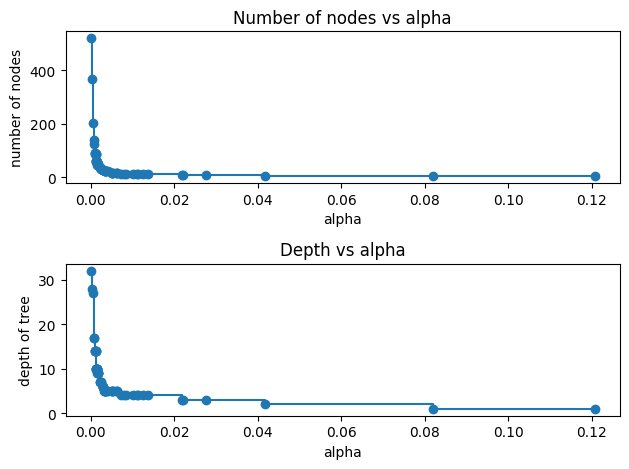

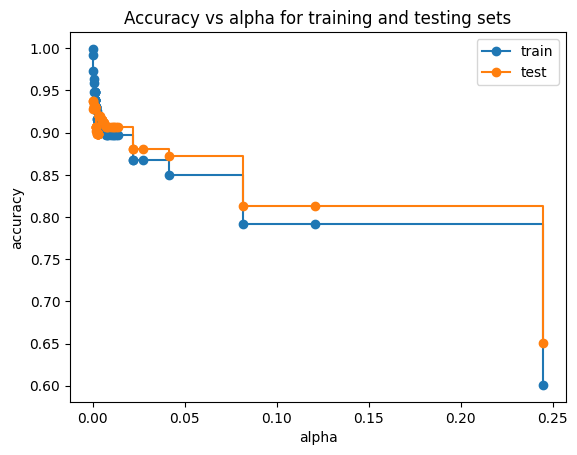

----------------------------------------------------------------
Accuracy on Training 0.9540760869565217
Accuracy on Test 0.9229098805646037
Number of nodes in the last tree is: 1 with ccp_alpha: 0.24577500247078088
Max Training Score: 0.99972826; Alpha: 0.00000000
Max Testing Score: 0.92399566; Alpha: 0.00074861


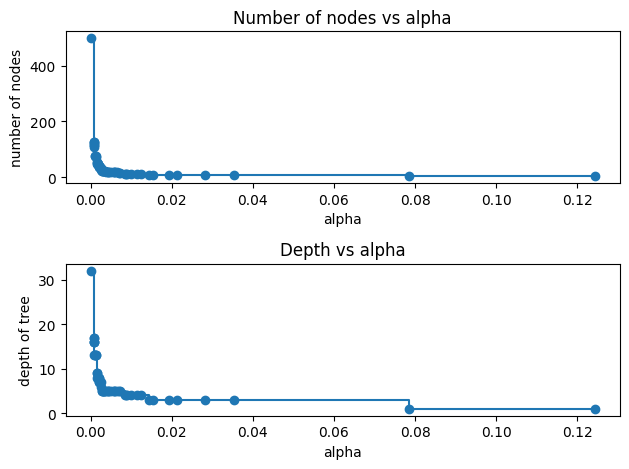

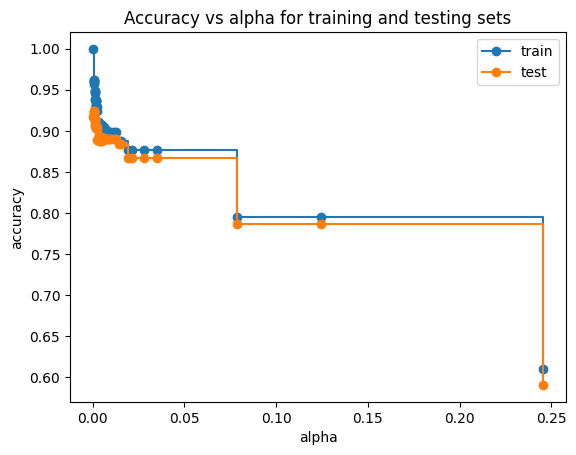

----------------------------------------------------------------
Accuracy on Training 0.9549689440993789
Accuracy on Test 0.9188993482983345
Number of nodes in the last tree is: 1 with ccp_alpha: 0.24298773000004137
Max Training Score: 0.99968944; Alpha: 0.00000000
Max Testing Score: 0.92396814; Alpha: 0.00023444


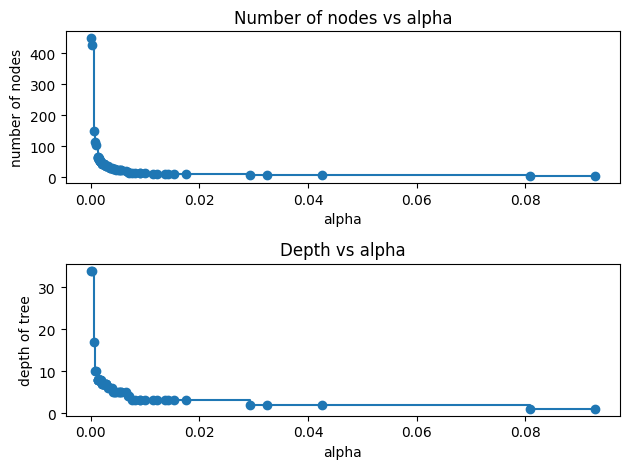

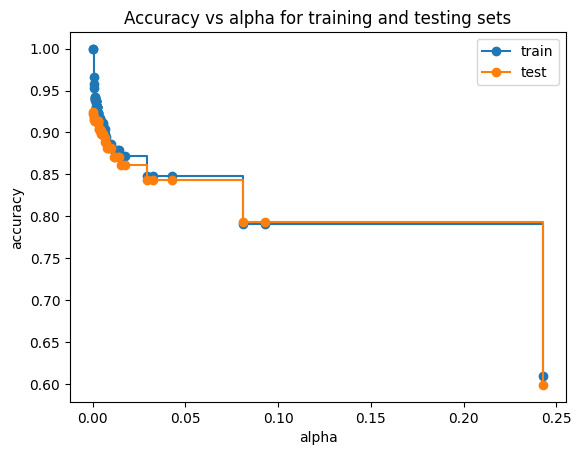

----------------------------------------------------------------
Accuracy on Training 0.9568840579710145
Accuracy on Test 0.9141770776751765
Number of nodes in the last tree is: 1 with ccp_alpha: 0.2523163579733909
Max Training Score: 1.00000000; Alpha: 0.00000000
Max Testing Score: 0.91526344; Alpha: 0.00087948


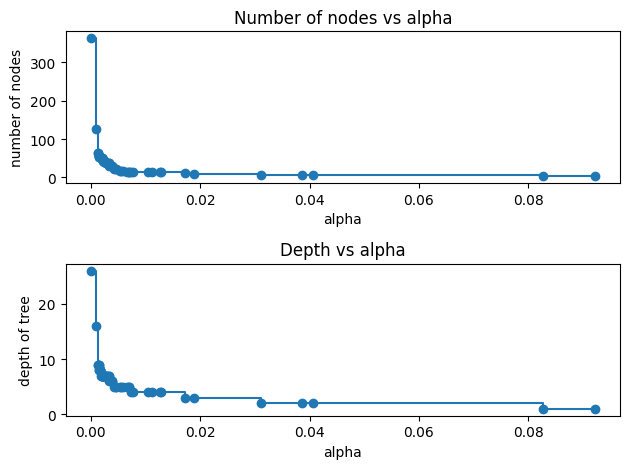

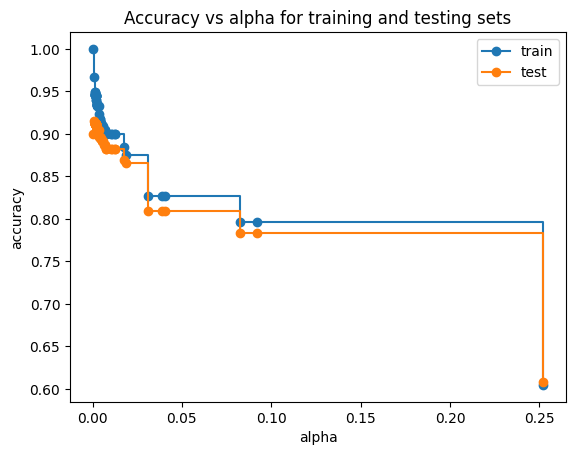

----------------------------------------------------------------
Accuracy on Training 0.96
Accuracy on Test 0.8987396784006954
Number of nodes in the last tree is: 1 with ccp_alpha: 0.2598021689891301
Max Training Score: 1.00000000; Alpha: 0.00000000
Max Testing Score: 0.90656236; Alpha: 0.00141092


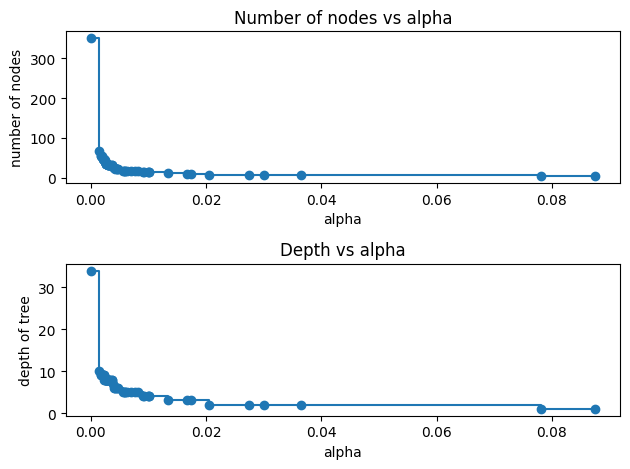

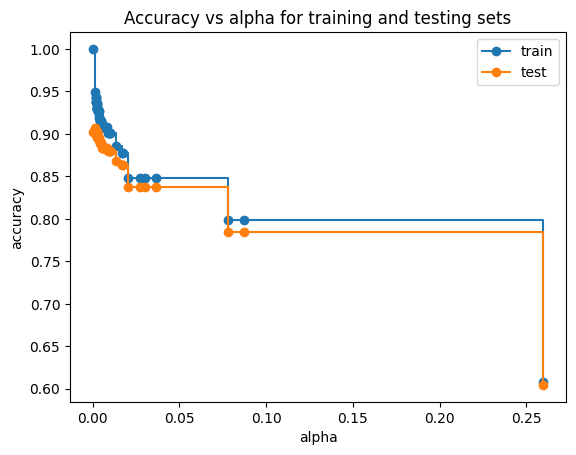

In [219]:
# Hyperparameter:
# Test_size
test_single_case(X, y, test_size=0.1, random_state=99)
test_single_case(X, y, test_size=0.2, random_state=99)
test_single_case(X, y, test_size=0.3, random_state=99)
test_single_case(X, y, test_size=0.4, random_state=99)
test_single_case(X, y, test_size=0.5, random_state=99)

In [217]:
# Hyperparameter:
# Tree depth

In [218]:
# Hyperparameter:
#